In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
from tqdm import tqdm

In [2]:
with open("mnist_data/X.npy","rb") as f:
    x_train = np.load(f)[:1000]
    
with open("mnist_data/y.npy","rb") as f:
    y_train = np.load(f)[:1000]

In [3]:
x_train = torch.from_numpy(x_train)
y_train = torch.tensor(y_train,dtype=torch.float64)


tensor([0.], dtype=torch.float64)

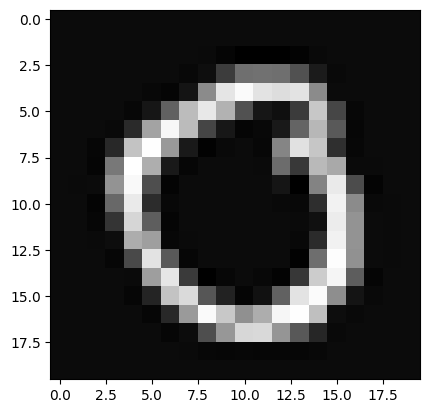

In [4]:
plt.imshow(x_train[100].reshape(20,20),cmap="gray")
y_train[100]

In [10]:
class MnistModel(nn.Module):
    def __init__(self,in_features):
        super().__init__()
        self.l1 = nn.Linear(in_features,25)
        self.l2 = nn.Linear(25,15)
        self.l3 = nn.Linear(15,1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.sigmoid(self.l3(x))
        return x

In [11]:
def train(x,y,epochs,lr,model):
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(),lr)
    p_bar = tqdm(total=epochs, desc="Training", unit="epoch")
    for i in range(epochs):
        optimizer.zero_grad()
        loss = criterion(model(x),y.reshape(-1,1))
        loss.backward()
        optimizer.step()
        p_bar.set_postfix({"Loss": loss.item()})
        p_bar.update(1)
    p_bar.close()

In [12]:
model = MnistModel(x_train.shape[1]).double()

In [13]:
model

MnistModel(
  (l1): Linear(in_features=400, out_features=25, bias=True)
  (l2): Linear(in_features=25, out_features=15, bias=True)
  (l3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (relu): ReLU()
)

In [14]:
train(x_train,y_train,1500,0.001,model)

Training: 100%|██████████| 1500/1500 [00:03<00:00, 441.27epoch/s, Loss=4.46e-5]


In [15]:
def predict(image_no):
    pred = model(x_train[image_no].reshape(1,-1))
    plt.title(f"The Prediction by the model is {1 if pred.item() >=0.5 else 0}")
    plt.imshow(x_train[image_no].reshape(20,20),cmap="gray")

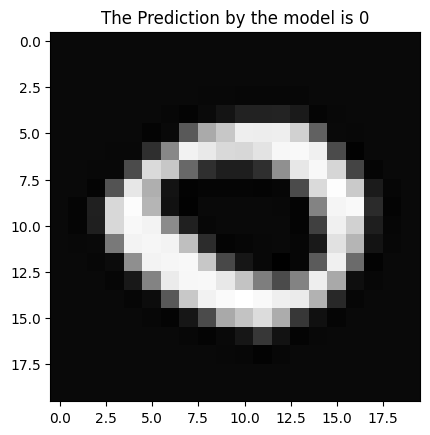

In [16]:
predict(99)

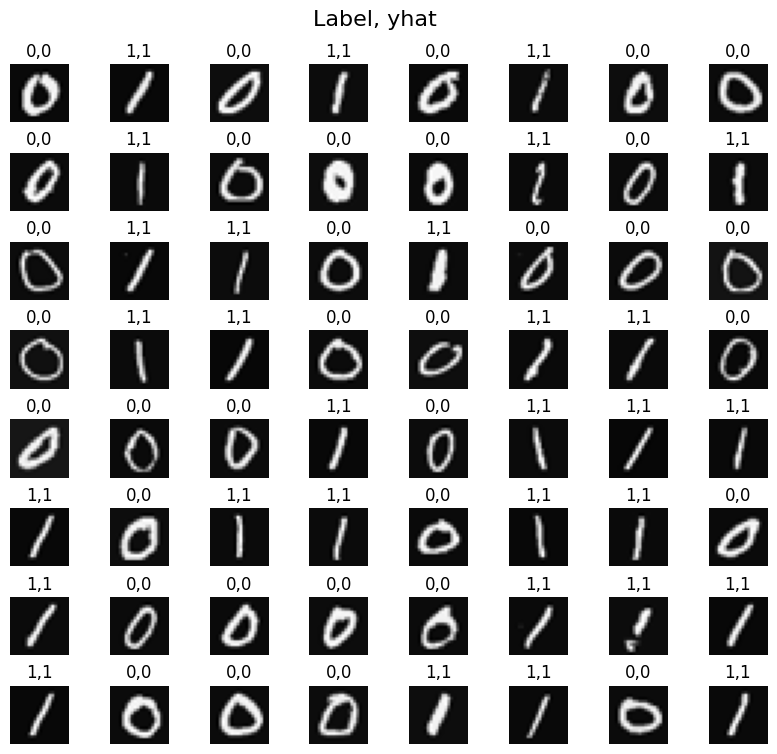

In [17]:
m, n = x_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model(x_train[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{int(y_train[random_index,0])},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()